In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Internship\Heart_disease_prediction\datasets\dataset.csv')

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
num_cols = ['age','resting bp s','cholesterol','max heart rate','oldpeak']
cat_cols = ['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope']
target = 'target'

# Univariate Analysis

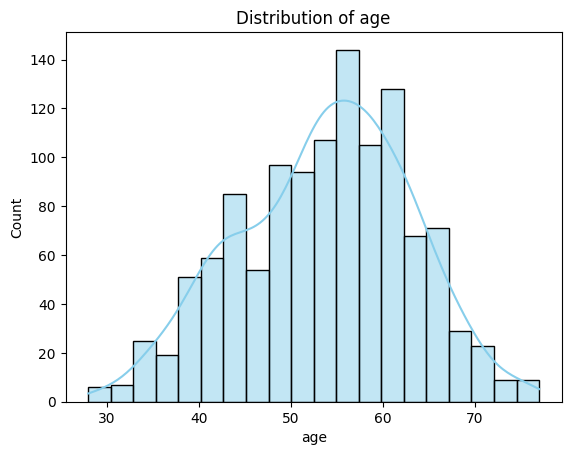

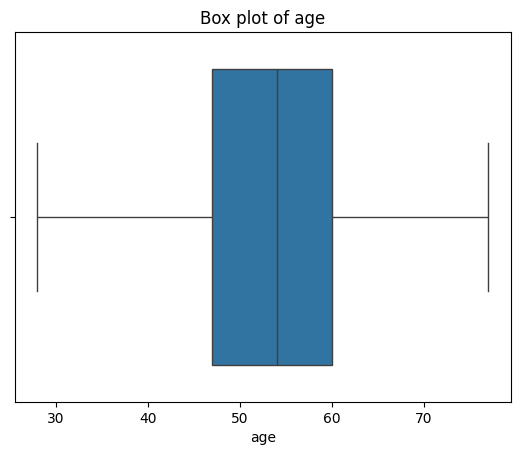

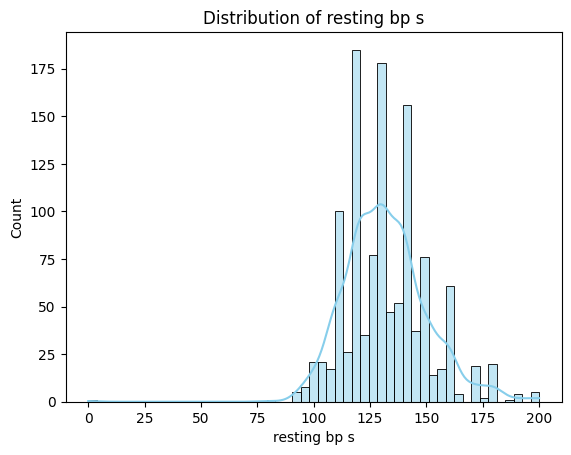

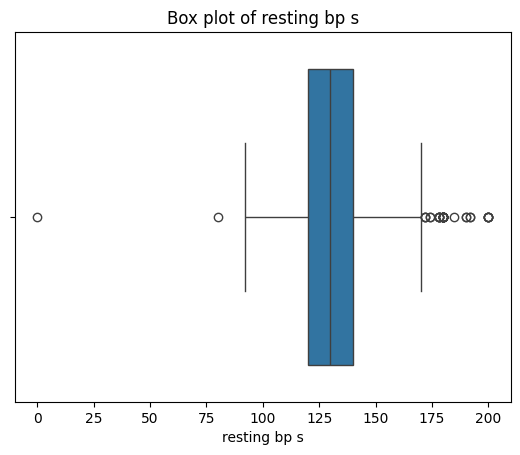

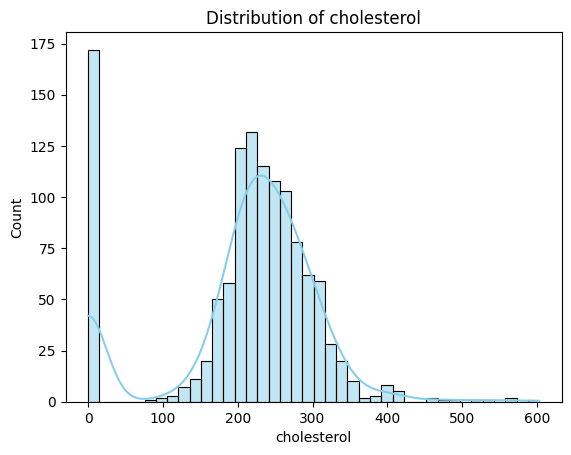

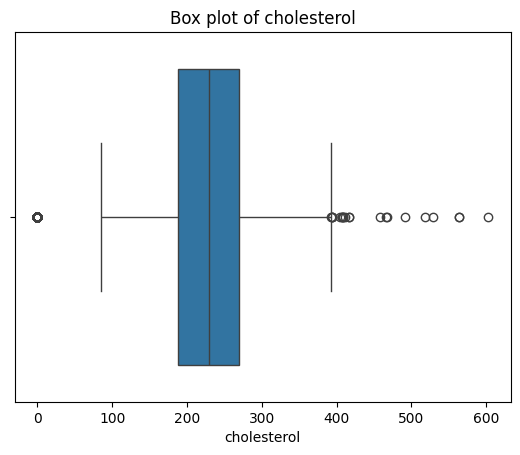

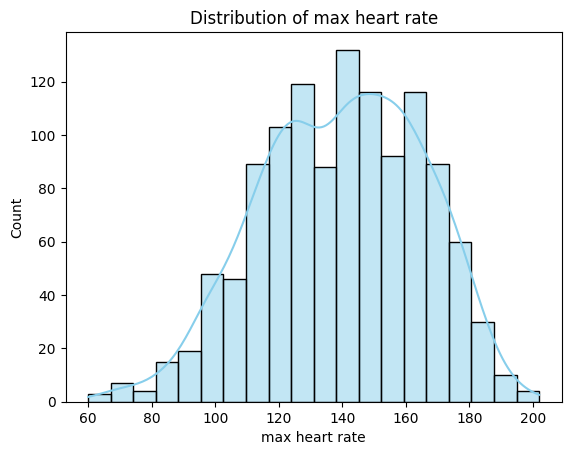

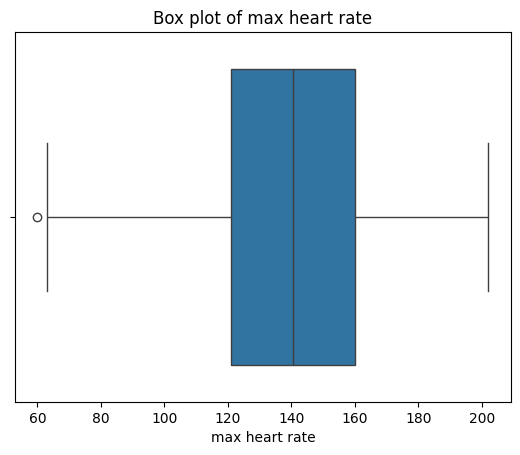

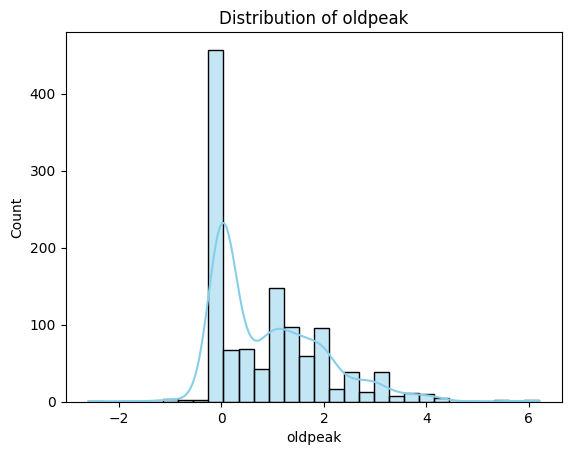

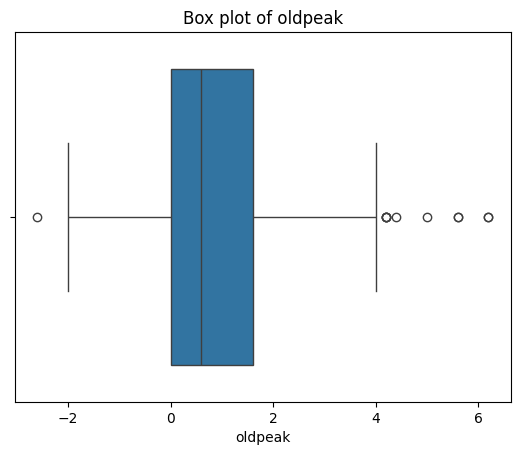

In [7]:
for col in num_cols:
    plt.Figure(figsize=(10,6))
    sns.histplot(df[col],color='skyblue',kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

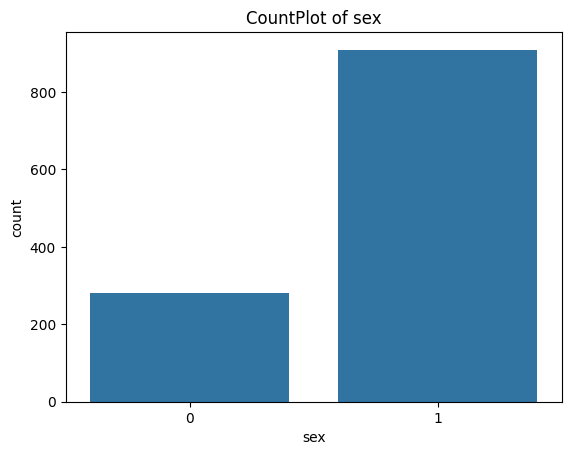

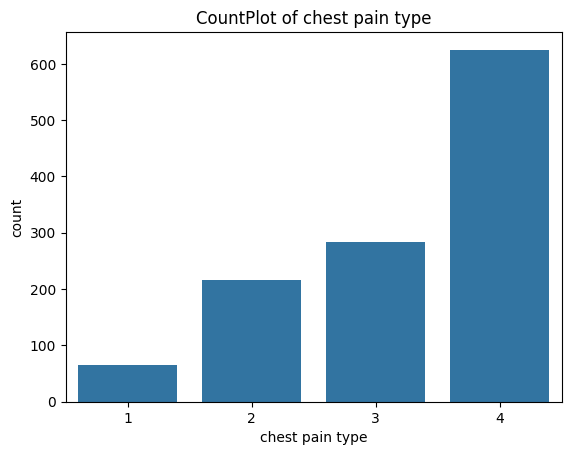

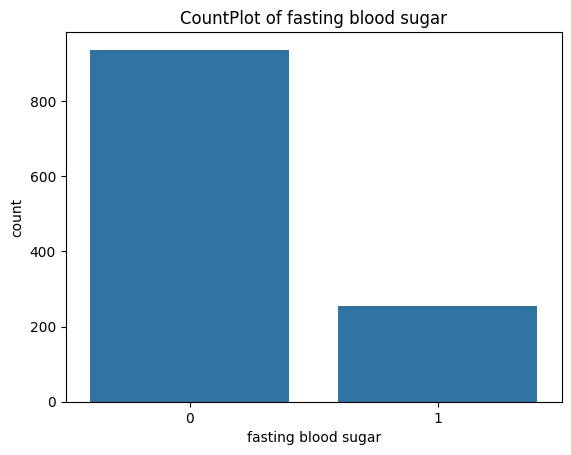

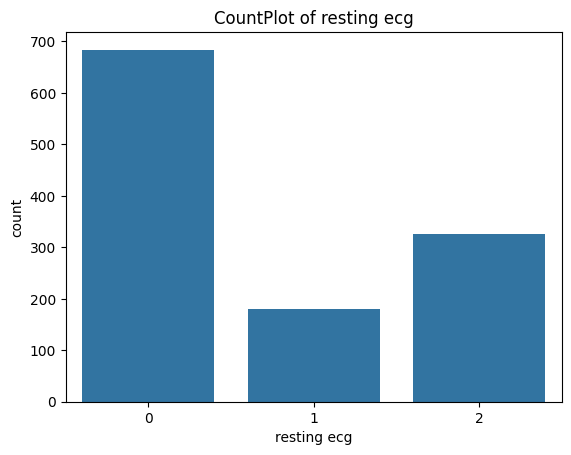

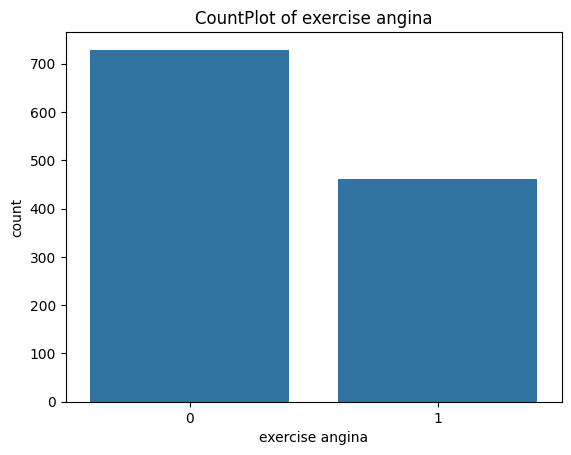

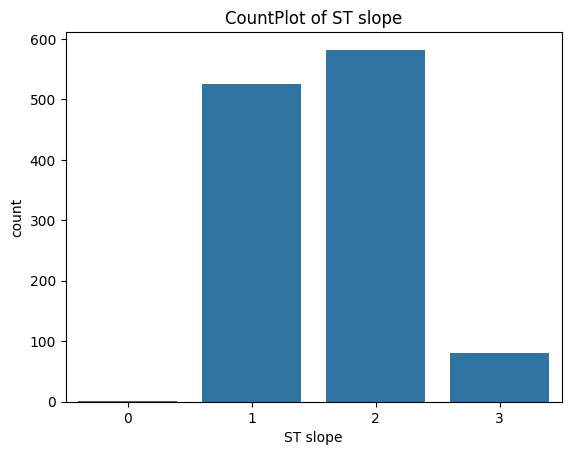

In [8]:
for col in cat_cols:
    plt.Figure(figsize=(10,6))
    sns.countplot(x=df[col])
    plt.title(f"CountPlot of {col}")
    plt.show()

# Bivariate Analysis

Numerical vs Target

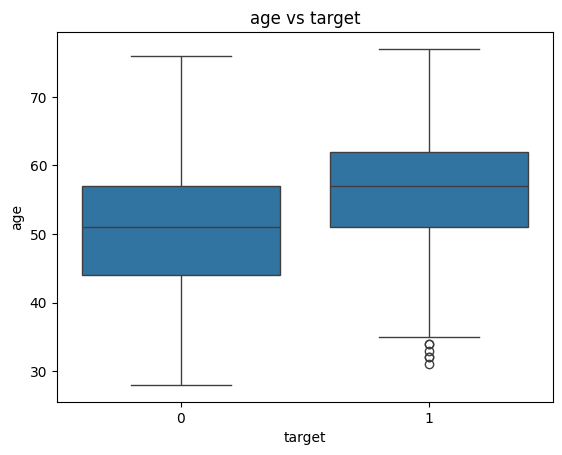

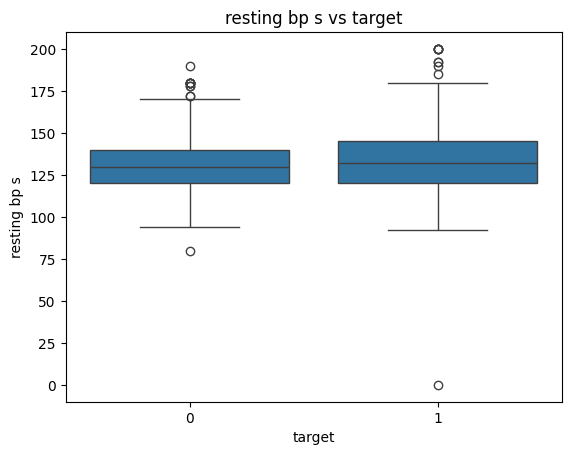

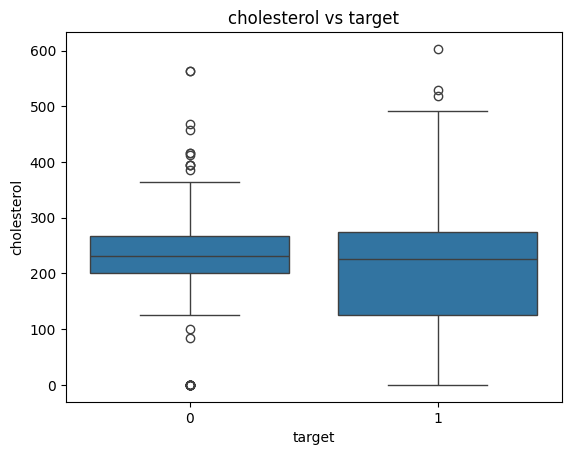

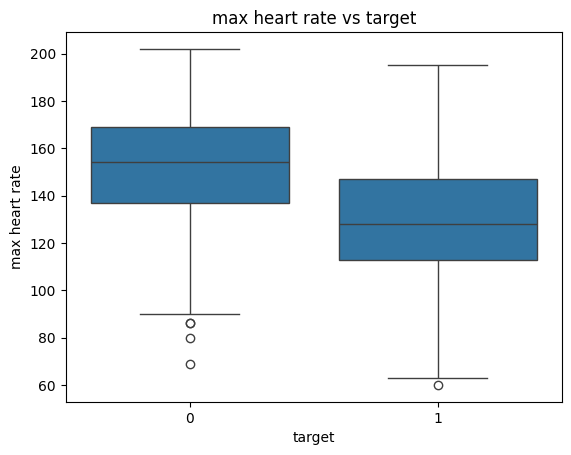

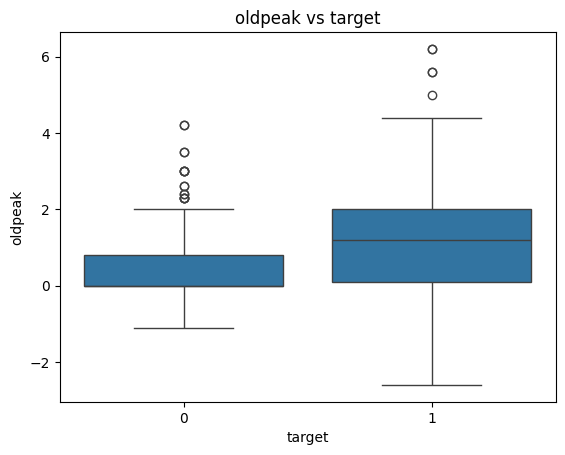

In [9]:
for col in num_cols:
        plt.figure()
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs {target}")
        plt.show()

Categorical vs Target

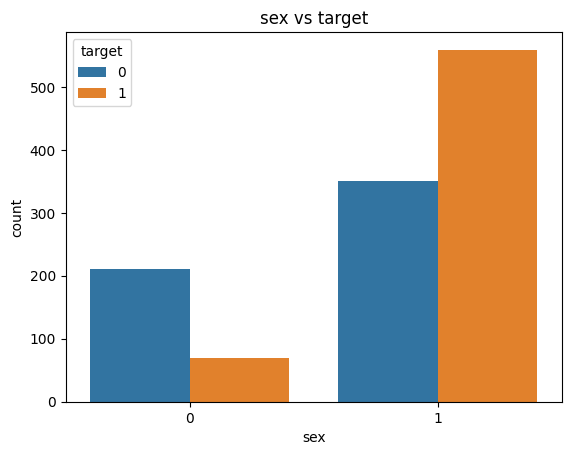

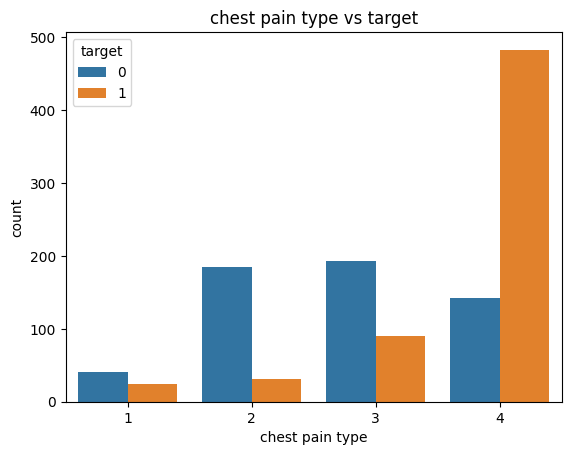

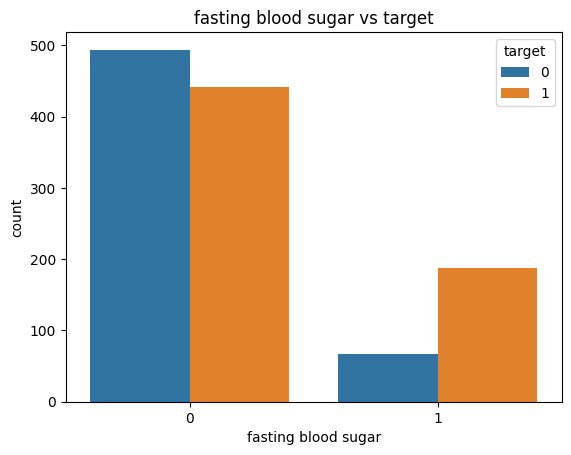

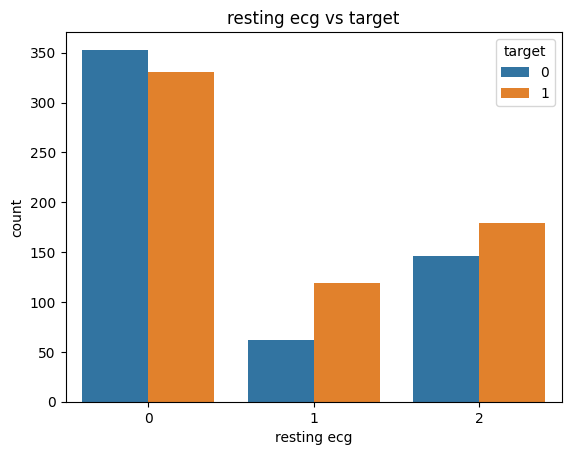

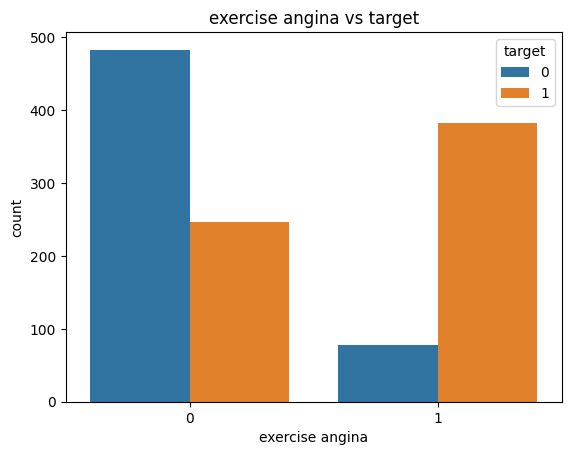

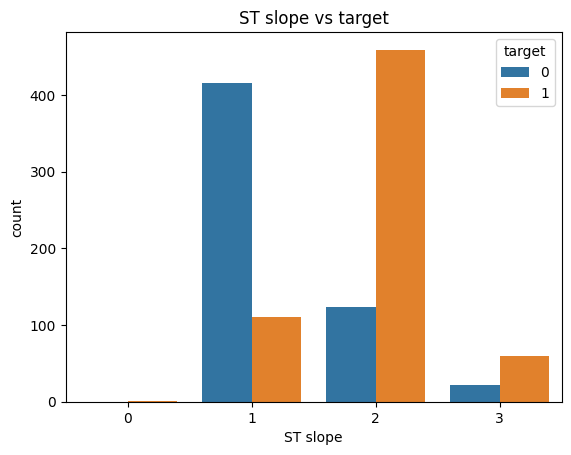

In [10]:
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f"{col} vs {target}")
    plt.show()


Numerical vs Numerical

In [11]:
num_cols.append('target')

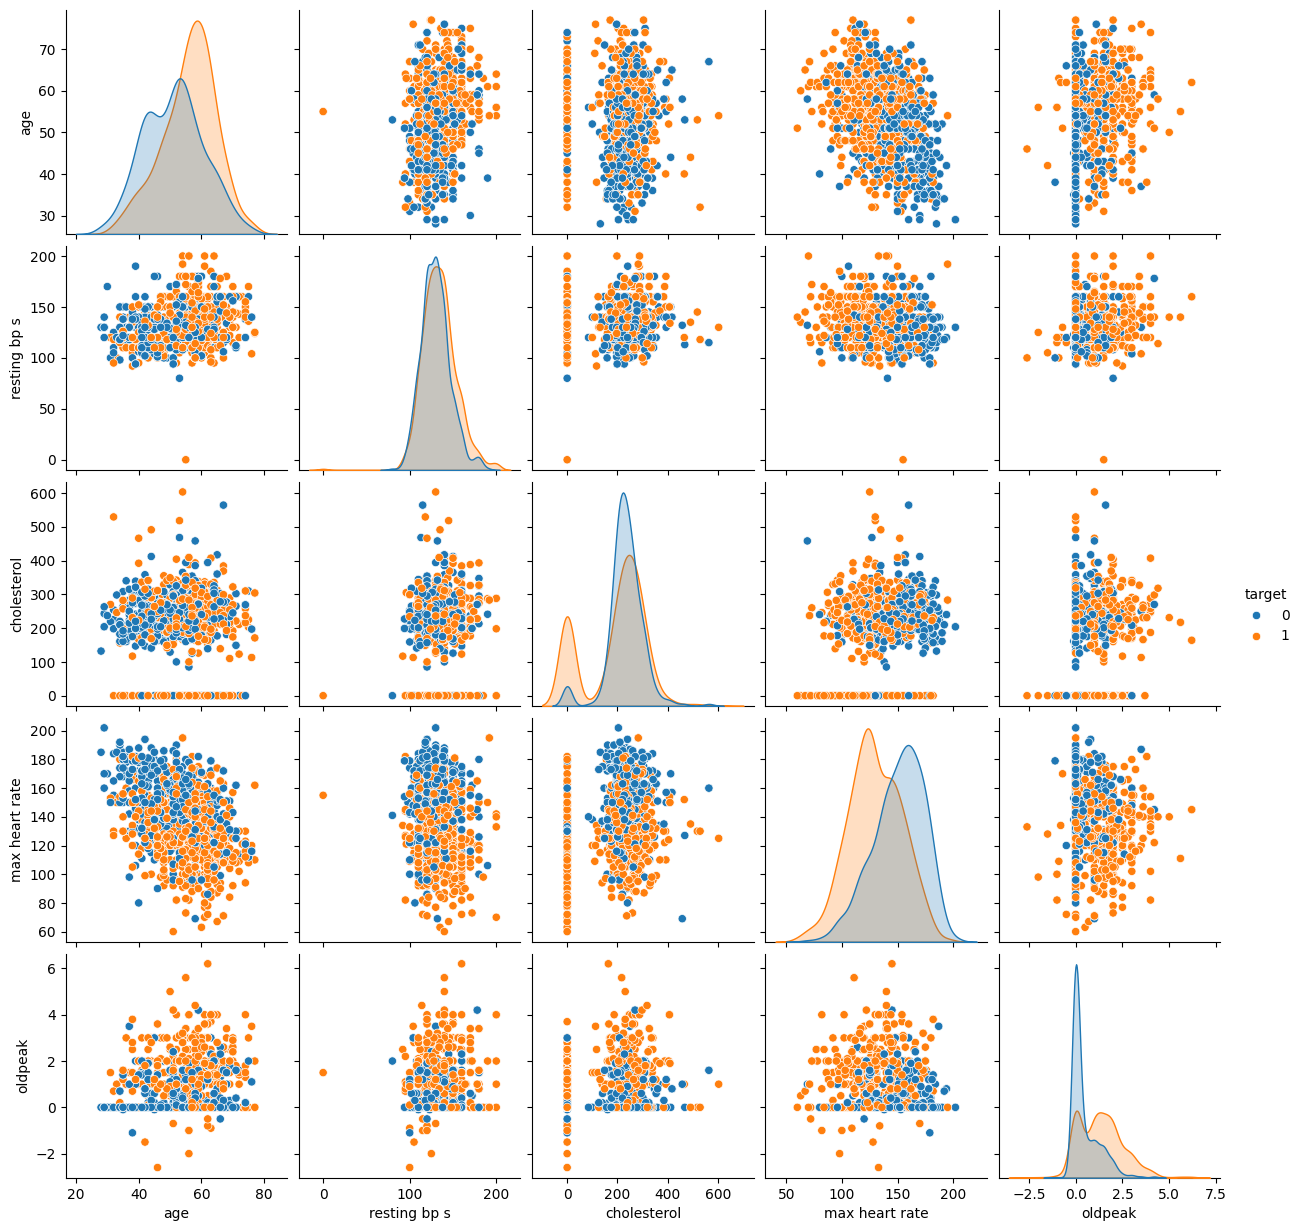

In [12]:
sns.pairplot(df[num_cols], hue='target')
plt.show()

# Multivariate Analysis

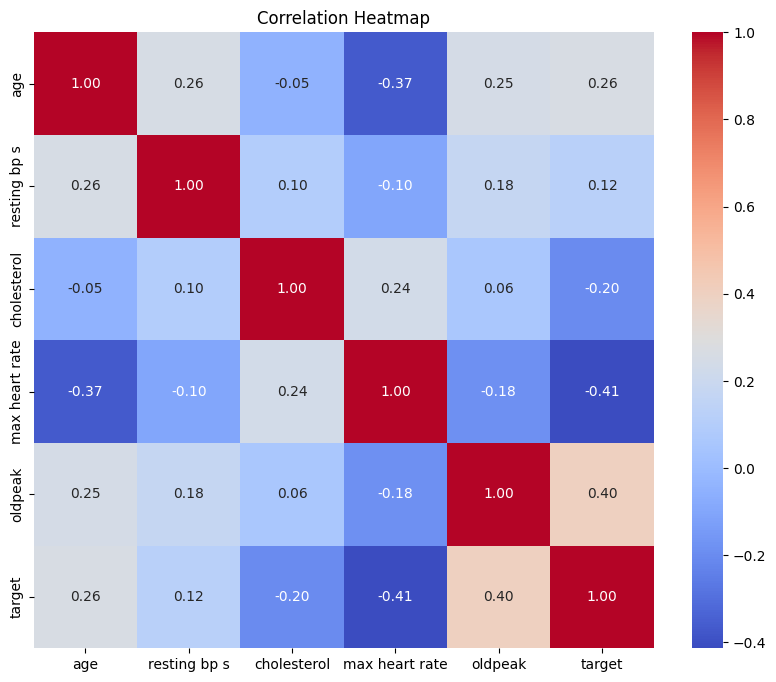

In [13]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df.groupby(target).mean()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
target,,,,,,,,,,,
0,51.124777,0.623886,2.777184,129.793226,231.657754,0.119430,0.631016,150.894831,0.139037,0.464706,1.297683
1,56.034976,0.888712,3.639110,134.259141,191.372019,0.297297,0.758347,129.777424,0.608903,1.331320,1.915739


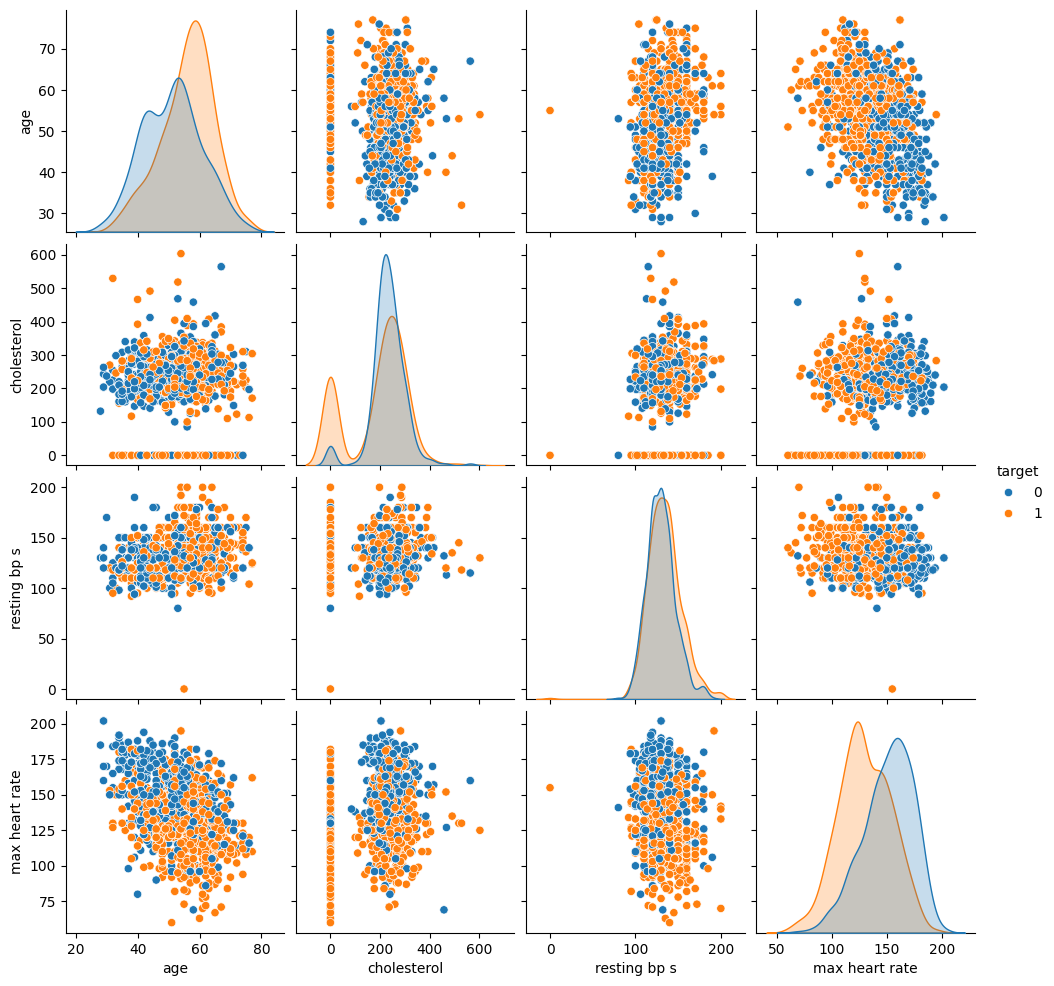

In [15]:
key_features = ["age", "cholesterol", "resting bp s", "max heart rate", target]

sns.pairplot(df[key_features], hue=target)
plt.show()